12. Use the marco geoestadístico 2010 and 2020  to obtain the “Áreas Geoestadísticas Básicas” (AGEBs) from Mérida, Yucatán. AGEBs evolve on time. Use sets to find:
- AGEBs which remains from 2010 on 2020.
- New AGEBs on 2020.
- AGEBs that disappear from 2010 to 2020.

Make a map with the following visualization to observe all three cases.

In [3]:
from geopandas import read_file
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

ageb_mex_2010 = read_file('AGEB_urb_2010_5.shp')
ageb_mex_2010["state_code"] = ageb_mex_2010['CVEGEO'].str.slice(0,2)
ageb_mex_2010["municipality_code"] = ageb_mex_2010["CVEGEO"].str.slice(2,5)
ageb_yucatan_2010 = ageb_mex_2010[ageb_mex_2010['state_code'] == '31']
ageb_merida_2010 = ageb_yucatan_2010[ageb_yucatan_2010["municipality_code"]=="050"]


ageb_yucatan_2020 = read_file('31a.shp')
ageb_merida_2020 = ageb_yucatan_2020[ageb_yucatan_2020["CVE_MUN"] == "050"]

merida_2010_geocodes = set(ageb_merida_2010['CVEGEO'])
merida_2020_geocodes = set(ageb_merida_2020['CVEGEO'])

intersection = merida_2010_geocodes.intersection(merida_2020_geocodes)
intersection_data = ageb_merida_2010[ageb_merida_2010['CVEGEO'].isin(intersection)]

changes = merida_2020_geocodes - merida_2010_geocodes
changes_data = ageb_merida_2020[ageb_merida_2020['CVEGEO'].isin(changes)]

disappeared = merida_2010_geocodes - merida_2020_geocodes
disappeared_data = ageb_merida_2010[ageb_merida_2010['CVEGEO'].isin(disappeared)]


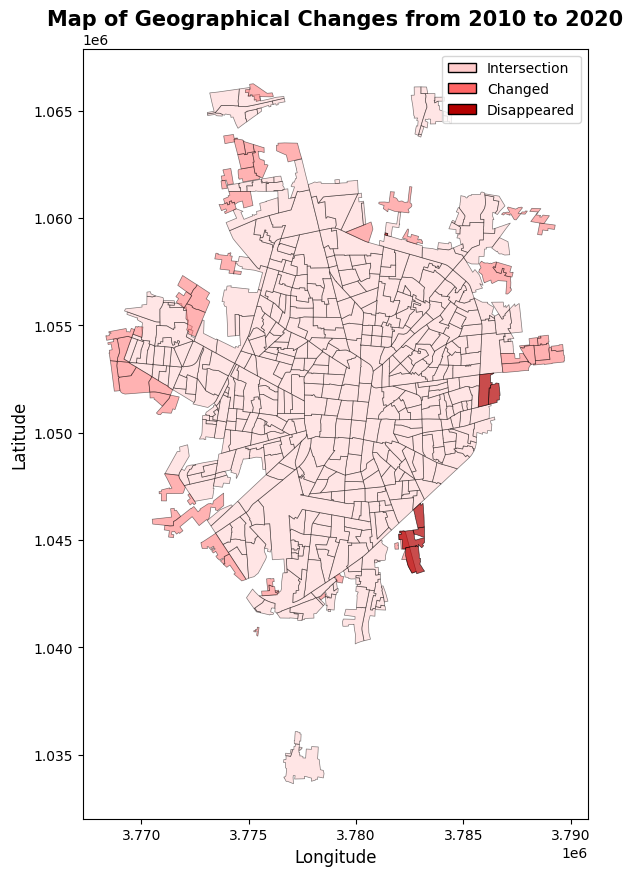

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

intersection_data.plot(ax=ax, color='#ffcccc', edgecolor='black', linewidth=0.5, alpha=0.5, label='Intersection')
changes_data.plot(ax=ax, color='#ff6666', edgecolor='black', linewidth=0.5, alpha=0.5, label='Changed')
disappeared_data.plot(ax=ax, color='#b30000', edgecolor='black', linewidth=0.5, alpha=0.7, label='Disappeared')

info = [
    Patch(facecolor='#ffcccc', edgecolor='black', label='Intersection'),
    Patch(facecolor='#ff6666', edgecolor='black', label='Changed'),
    Patch(facecolor='#b30000', edgecolor='black', label='Disappeared')
]
ax.legend(handles=info, loc='upper right')

ax.set_title('Map of Geographical Changes from 2010 to 2020', fontsize=15, fontweight='bold')
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

ax.set_facecolor('white')

plt.show()